### DIFFERENT CLASSIFICATION MODELS FOR THE DATA

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
data = pd.read_csv("../data/cleaned_data.csv") 

In [4]:
features = data.drop("Churn", axis=1)
target = data["Churn"] 

In [5]:
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2, random_state=64)

In [6]:
numeric_features = list(trainX.select_dtypes(include=['number']).columns)
categorical_features = list(trainX.select_dtypes(include=['object','category']).columns)

preprocessor = ColumnTransformer(
    transformers = [
        ('numeric', StandardScaler(), numeric_features),
        ('categ', OneHotEncoder(), categorical_features)
    ]
) 

#### MODEL

In [7]:
# FUNCTION FOR TRAINING MODEL VIA PIPELINE
def train(model, trainX, trainY):
    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
    ])
    pipeline.fit(trainX, trainY)
    return pipeline

def evaluate(model, model_name, testX, testY):
    predY = model.predict(testX)
    probsY = model.predict_proba(testX)[:, 1]
    print(f"Accuracy: {accuracy_score(testY, predY)}")

    # CONFUSION MATRIX
    cm = confusion_matrix(testY, predY)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    # CLASSIFICATION REPORT
    cr = classification_report(testY, predY, output_dict=True)
    report_df = pd.DataFrame(cr).transpose()
    print("Classification Report:\n", report_df)

    # ROC-AUC CURVE
    fpr, tpr, thresholds = roc_curve(testY, probsY)
    roc_auc = roc_auc_score(testY, probsY)

    # PLOTTING
    fig, ax = plt.subplots(1, 3, figsize=(10, 3))
    disp.plot(cmap='Blues', ax=ax[0])
    ax[0].set_title("Confusion Matrix")

    ax[1].plot(fpr, tpr, label=f"AUC: {roc_auc:.2f}")
    ax[1].set_xlabel("False Positive Rate")
    ax[1].set_ylabel("True Positive Rate")
    ax[1].set_title("ROC-AUC Curve")
    ax[1].legend()
    ax[1].grid()

    ax[2].hist(probsY, histtype='step')
    ax[2].set_xlabel("Probabilities")
    ax[2].set_title("Probabilities distribution")
    ax[2].grid()

    plt.suptitle(f"{model_name} Model")
    plt.tight_layout()
    plt.show() 

LOGISTIC REGRESSION

In [6]:
from sklearn.linear_model import LogisticRegression

Accuracy: 0.8503988440450506
Classification Report:
               precision    recall  f1-score        support
0              0.820786  0.849775  0.835029   45019.000000
1              0.875756  0.850901  0.863149   56023.000000
accuracy       0.850399  0.850399  0.850399       0.850399
macro avg      0.848271  0.850338  0.849089  101042.000000
weighted avg   0.851264  0.850399  0.850620  101042.000000


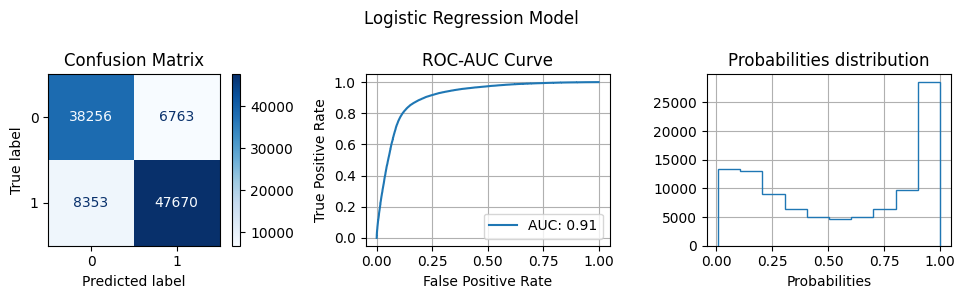

In [55]:
logistic_classifier = LogisticRegression(C=0.1, solver='liblinear')
model = train(logistic_classifier, trainX, trainY) 
evaluate(model, "Logistic Regression", testX, testY) 

RANDOM FOREST

In [40]:
from sklearn.ensemble import RandomForestClassifier

Accuracy: 0.9323647592090418
Classification Report:
               precision    recall  f1-score        support
0              0.988262  0.858393  0.918761   45019.000000
1              0.897076  0.991807  0.942066   56023.000000
accuracy       0.932365  0.932365  0.932365       0.932365
macro avg      0.942669  0.925100  0.930413  101042.000000
weighted avg   0.937704  0.932365  0.931682  101042.000000


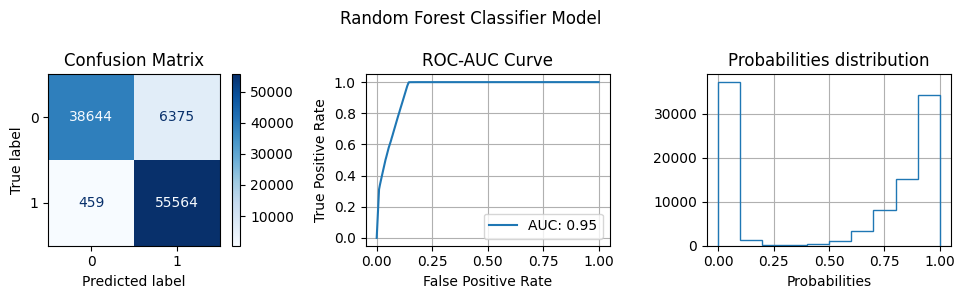

In [56]:
random_forest_classifier = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, min_samples_leaf=2)
model = train(random_forest_classifier, trainX, trainY) 
evaluate(model, "Random Forest Classifier", testX, testY) 

GRADIENT BOOSTING CLASSIFIER

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

      Iter       Train Loss   Remaining Time 
         1           1.2264           10.61m
         2           1.1065            9.47m
         3           1.0074            9.45m
         4           0.9242            9.42m
         5           0.8536            9.30m
         6           0.7932            8.88m
         7           0.7415            8.57m
         8           0.6968            8.31m
         9           0.6576            8.16m
        10           0.6235            8.09m
        20           0.4373            7.46m
        30           0.3699            6.59m
        40           0.3397            5.70m
        50           0.3208            4.66m
        60           0.3078            3.69m
        70           0.2978            2.81m
        80           0.2894            1.86m
        90           0.2824           55.81s
       100           0.2748            0.00s
Accuracy: 0.9356802121889907
Classification Report:
               precision    recall  f1-score   

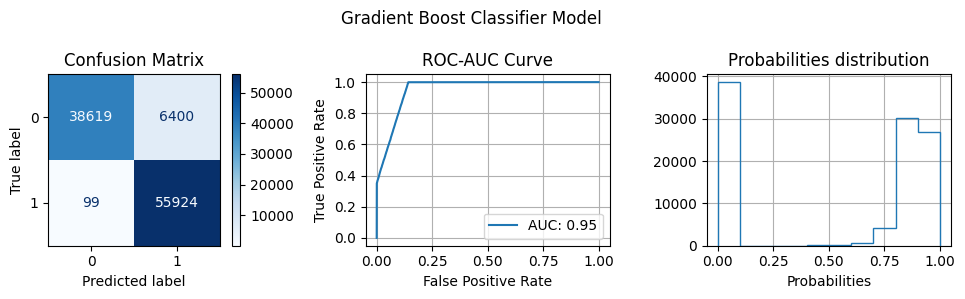

In [57]:
gradient_boost_classifier = GradientBoostingClassifier(max_depth = 10, random_state=42, verbose=1)
model = train(gradient_boost_classifier, trainX, trainY) 
evaluate(model, "Gradient Boost Classifier", testX, testY) 

XG BOOST CLASSIFIER

In [1]:
# import xgboost as xgb

In [9]:
# xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=7)
# model = train(xgb_classifier, trainX, trainY) 
# evaluate(model, "XG Boost Classifier", testX, testY) 